In [ ]:
import numpy as np

# PRE PROCESSING AND STEAMING USING SASTRAWI
import re
import emoji
import string
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer

# LDA Model 
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


# Download NLTK punkt tokenizer
nltk.download('punkt')
nltk.download('punkt_tab')

from collections import defaultdict
from torch.utils.data import DataLoader

#fine Tuning and Evaluasi Dataset
import torch.optim as optim

##VISUALISASI & Machine Learing Evaluation##
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import networkx as nx
import logging
from IPython.display import display, HTML


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\binta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\binta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# IMPORT DATASET

In [6]:
df = pd.read_csv("final project mdtt data/review_hotel_bumi.csv")

In [ ]:
df.head()

,Reviewer,Rating (1-5),Ulasan
0,Aditya Budianto,1,1st time pengalaman nginep di hotel ini. hotel...
1,Lala Afrian,5,🌟 Rating: 5/5 Staycation bersama anak di Bumi...
2,Jennypuspita,4,"Kita stay di Classic Room,plusnya semua kamar ..."
3,siti khamidah,4,Dulu saat pertama kali staycation di Bumi Sura...
4,Wahyu Abdullah,4,"Kamar nya bersih, luas hanya saja desain lama...."


In [ ]:
len(df.index) #TOTAL DATA

1250

In [ ]:
df=df[['Rating (1-5)', 'Ulasan']]


In [10]:
df.head()

,Rating (1-5),Ulasan
0,1,1st time pengalaman nginep di hotel ini. hotel...
1,5,🌟 Rating: 5/5 Staycation bersama anak di Bumi...
2,4,"Kita stay di Classic Room,plusnya semua kamar ..."
3,4,Dulu saat pertama kali staycation di Bumi Sura...
4,4,"Kamar nya bersih, luas hanya saja desain lama...."


# PIE CHART AND BAR CHART USER REVIEWS BASED ON SCORES OF 1-5

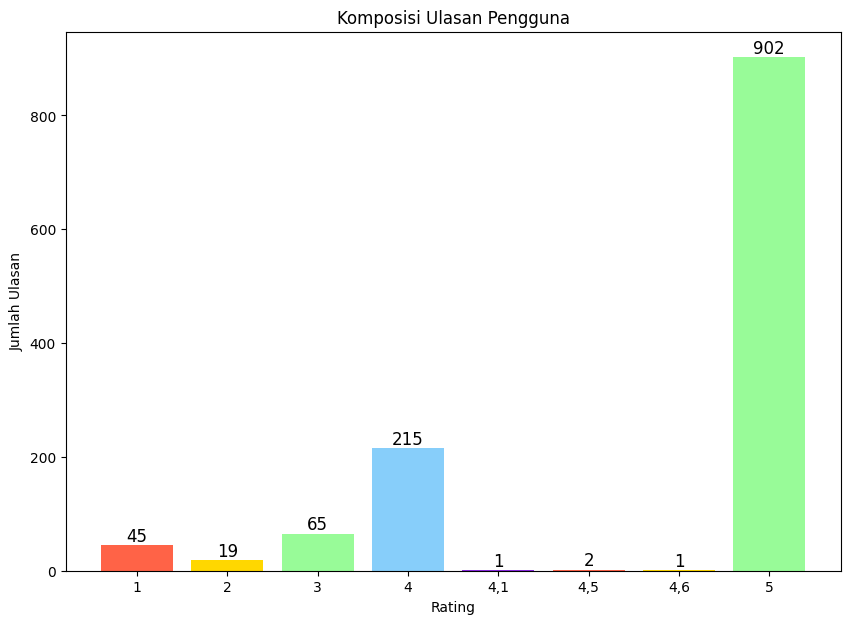

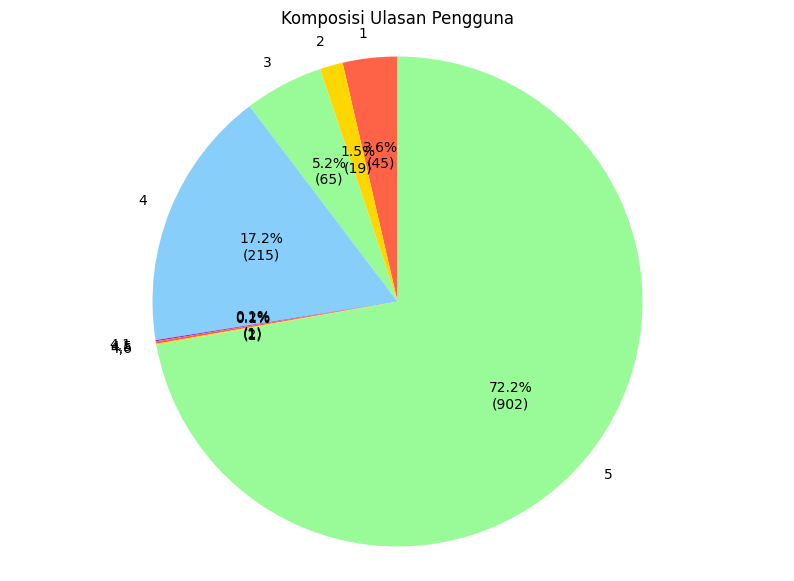

In [ ]:
rating_counts = df['Rating (1-5)'].value_counts().sort_index()


labels = rating_counts.index
sizes = rating_counts.values
color = ['#FF6347', '#FFD700', '#98FB98', '#87CEFA', '#8A2BE2']


def label_format(pct, allvalues):
    count = int(round(pct * sum(allvalues) / 100))
    return f'{pct:.1f}%\n({count})'

df_bar_chart = plt.figure(figsize=(10, 7))
bars = plt.bar(labels, sizes, color=color[:len(sizes)])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', ha='center', va='bottom', fontsize=12, color='black')

plt.title('Komposisi Ulasan Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah Ulasan')

plt.show()


df_pie_chart_new = plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct=lambda pct: label_format(pct, sizes),
        startangle=90, colors=color[:len(sizes)])
plt.title('Komposisi Ulasan Pengguna')
plt.axis('equal')
plt.show()



In [12]:
df.to_csv("final project mdtt data/scrapped_data.csv", index = False)  #kemudian save menjadi file csv

# CLEANING DATA

In [14]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('final project mdtt data/scrapped_data.csv')
my_df.head(50)

,Rating (1-5),Ulasan
0,1,1st time pengalaman nginep di hotel ini. hotel...
1,5,🌟 Rating: 5/5 Staycation bersama anak di Bumi...
2,4,"Kita stay di Classic Room,plusnya semua kamar ..."
3,4,Dulu saat pertama kali staycation di Bumi Sura...
4,4,"Kamar nya bersih, luas hanya saja desain lama...."
5,5,"Hotelnya bagus, asri, hijau,tenang fresh gitu...."
6,4,We enjoy our staying in hotel bumi because the...
7,5,Kita ke Bumi Hotel untuk lunch buffet aja ada ...
8,5,"Lokasi hotel strategis, ada di tengah kota dek..."
9,1,"Dulu hotel ini bagus, tapi tidak utk skrg Saat..."


In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rating (1-5)  1250 non-null   object
 1   Ulasan        1250 non-null   object
dtypes: object(2)
memory usage: 19.7+ KB


In [ ]:
my_df.isna()

,Rating (1-5),Ulasan
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1245,False,False
1246,False,False
1247,False,False
1248,False,False


In [17]:
my_df.isna().any()

Rating (1-5)    False
Ulasan          False
dtype: bool

In [18]:
my_df.describe()

,Rating (1-5),Ulasan
count,1250,1250
unique,8,1250
top,5,1st time pengalaman nginep di hotel ini. hotel...
freq,902,1


In [19]:
#mencari jumlah baris data yang bernilai null
#terdapat kolom label memiliki nilai kosong
my_df.isnull().sum()  

Rating (1-5)    0
Ulasan          0
dtype: int64

# CASE FOLDING AND PRE PROCESSING

In [ ]:
# dataset normalization
kata_baku_df = pd.read_excel('kata-baku/katabaku_updated.xlsx')

# additional normalization data
additional_words = {
    'yg': 'yang', 'ga': 'tidak', 'gak': 'tidak', 'nggak': 'tidak', 'tdk': 'tidak',
    'jd': 'jadi', 'aja': 'saja', 'cm': 'cuma', 'tp': 'tapi', 'sy': 'saya', 'dr': 'dari', 'dg': 'dengan',
    'bgt': 'banget', 'bangettt': 'banget', 'bangetttttt': 'banget', 'ok': 'baik', 'oke': 'baik',
    'okey': 'baik', 'mantul': 'mantap betul', 'toppp': 'top', 'baguss': 'bagus', 'baguus': 'bagus',
    'gercep': 'gerak cepat', 'nginep': 'menginap', 'checkin': 'check in', 'checkout': 'check out',
    'resto': 'restoran', 'hotelnya': 'hotel', 'kamarnya': 'kamar', 'disini': 'di sini',
    'suasana': 'situasi', 'anak2': 'anak-anak', 'kalo': 'kalau', 'ya': 'iya',
    'ramah.': 'ramah', 'ramah,': 'ramah', 'enak.': 'enak', 'enak,': 'enak', 'bagus,': 'bagus', 'bagus.': 'bagus',
    'layan': 'pelayanan', 'inap': 'menginap', 'sarap': 'sarapan', 'food': 'makanan', 'all': 'allyoucaneat', 'eat': '','can': '','you':'', 'surabaya.': 'surabaya','stdrt':'standar'
}



# Convert kata_baku_df words into a dictionary for normalization
normalization_dataset = dict(zip(kata_baku_df['tidak_baku'], kata_baku_df['kata_baku']))

# Combining existing normalization datasets
normalization_dataset.update(additional_words)


# Load additional stopwords
additional_stopwords_df = pd.read_excel('final project mdtt data/stopwords_ind.xlsx')
print(additional_stopwords_df)
additional_stopwords = additional_stopwords_df['stopwords '].tolist()

# Initialize stopwords and stemmer
stop_factory = StopWordRemoverFactory()
more_stopword = [
    'hotel', 'hotelnya', 'kamar', 'kamarnya', 'lokasi', 'tempat', 'bangunan',
    'suasana', 'pelayanan', 'sarapan', 'fasilitas', 'restoran', 'resto', 'breakfast', 'check', 'in', 'out',
    'kolam', 'taman', 'staff', 'pegawai', 'pengalaman', 'menurut', 'bagus', 'baik', 'enak', 'nyaman', 'mantap',
    'sekali', 'banget', 'top', 'terbaik', 'terlalu', 'cukup', 'biasa', 'saja', 'sih', 'dong', 'aja', 'nih', 'deh',
    'itu', 'ini', 'nya', 'nya.', 'kayak', 'pun', 'juga', 'kami', 'kita', 'saya', 'anda', 'mereka', 'lebih',
    'lagi', 'dari', 'ke', 'di', 'yang', 'dengan', 'untuk', 'adalah', 'tersebut', 'terlihat', 'hingga', 'jadi',
    'ga', 'gak', 'tdk', 'tp', 'jg', 'cm', 'sm', 'dr', 'jd', 'yg', 'ok', 'oke', 'okey', 'bgt', 'sy', 'dg', 'ya'
]


stop_words = set(stop_factory.get_stop_words() + more_stopword + additional_stopwords)

stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

     stopwords 
0           ada
1        adalah
2        adanya
3        adapun
4          agak
...         ...
1099       uwow
1100     huhuhu
1101        gin
1102        gmn
1103      doank

[1104 rows x 1 columns]


In [ ]:
from collections import Counter
all_words = ' '.join(my_df['Ulasan']).split()
word_counts = Counter(all_words)
print(word_counts)

Counter({'dan': 1477, 'di': 1131, 'yang': 892, 'hotel': 673, 'yg': 587, 'sangat': 577, 'ada': 541, 'dengan': 502, 'kamar': 450, 'untuk': 417, 'nya': 394, 'juga': 388, 'Hotel': 347, 'saya': 326, 'banyak': 304, 'tidak': 265, 'ini': 243, 'dari': 235, 'bisa': 234, 'kota': 233, 'makanan': 230, 'ke': 215, 'luas': 210, 'menu': 191, 'enak': 185, 'nyaman': 181, 'tapi': 180, 'Kamar': 169, 'cukup': 167, 'bintang': 158, 'menginap': 147, 'kolam': 147, 'karena': 141, 'tengah': 137, 'Surabaya': 137, 'masih': 137, 'ramah': 134, 'kurang': 130, 'sudah': 128, 'tempat': 127, 'banget': 125, 'bagus': 123, 'seperti': 121, 'luas,': 116, 'makan': 114, 'renang': 114, 'breakfast': 113, 'disini': 112, 'buat': 111, 'jadi': 110, 'pelayanan': 110, '5': 108, 'Bumi': 104, 'suasana': 103, 'bersih': 97, 'Untuk': 96, 'nyaman,': 96, 'satu': 95, 'pilihan': 95, 'fasilitas': 95, ',': 94, 'ga': 94, 'saat': 93, 'lebih': 92, 'semua': 91, 'mandi': 91, 'lagi': 91, 'atau': 90, 'hanya': 90, 'baik': 89, 'sarapan': 87, 'sama': 86, 'a

In [ ]:
# Function to remove repeating characters (more than twice) using regex
def repeatcharClean(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)  # Replace characters repeated more than twice

# Function to clean text
def clean_text(my_df, text_field, new_text_field_name, normalization_dataset):
    # Convert to lowercase
    my_df[new_text_field_name] = my_df[text_field].str.lower()

    # Normalize using a dictionary lookup
    def normalize_text(text):
        return ' '.join([normalization_dataset.get(word, word) for word in text.split()])
    
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(normalize_text)

    # Remove special characters, numbers, URLs, and usernames in one step
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(
        lambda text: re.sub(r"(@\w+|https?://\S+|www\.\S+|[^0-9a-zA-Z\s])", " ", text)
    )

    # Remove digits
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda text: re.sub(r'\d+', '', text))

    # Remove emojis directly
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda text: emoji.demojize(text))
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda text: re.sub(r':[A-Za-z_-]+:', '', text))

    # Remove extra spaces and apply character repetition cleaning
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(
        lambda text: re.sub(r'\s+', ' ', repeatcharClean(text)).strip()
    )

    return my_df

# Preprocessing function for LDA (includes stemming and stopword removal)
def stemming_text(text):
    # Apply stemming
    text = stemmer.stem(text)

    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    
    # Reconstruct cleaned text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Example usage:
data_clean = clean_text(my_df, 'Ulasan', 'text_clean', normalization_dataset)

# Apply stemming preprocessing
data_clean['text_clean_stemming'] = data_clean['text_clean'].apply(stemming_text)

# Drop rows with NaN or empty strings
data_clean = data_clean.dropna(subset=['text_clean'])
data_clean = data_clean[data_clean['text_clean'].str.strip() != ""]
data_clean = data_clean.reset_index(drop=True)

# Display the result
print(data_clean[['Ulasan', 'text_clean', 'text_clean_stemming']])

# Export cleaned data
data_clean.to_csv('final project mdtt data/data_clean.csv', index=False)

                                                 Ulasan  \
0     1st time pengalaman nginep di hotel ini. hotel...   
1     🌟 Rating: 5/5  Staycation bersama anak di Bumi...   
2     Kita stay di Classic Room,plusnya semua kamar ...   
3     Dulu saat pertama kali staycation di Bumi Sura...   
4     Kamar nya bersih, luas hanya saja desain lama....   
...                                                 ...   
1245  All you can eat di hotel bumi sangat enak, ban...   
1246  Comfortable,,, aroma terapi d ruangan..  nyama...   
1247  Breakfast stdrt bintang 5 terlalu sederhana. E...   
1248  Resto buffet nya enak poll. Banyak jenis makan...   
1249  Hotel yg asri dan nyaman,  kamarnya luas,  bre...   

                                             text_clean  \
0     st time pengalaman menginap di hotel ini hotel...   
1     rating staycation bersama anak di bumi surabay...   
2     kita stay di classic room plusnya semua kamar ...   
3     dulu saat pertama kali staycation di bumi sura...

In [ ]:
from collections import Counter
all_words = ' '.join(data_clean['text_clean']).split()
word_counts = Counter(all_words)
print(word_counts)

Counter({'dan': 1540, 'yang': 1528, 'di': 1305, 'hotel': 1204, 'kamar': 803, 'ada': 666, 'dengan': 635, 'sangat': 634, 'untuk': 607, 'tidak': 576, 'juga': 492, 'saya': 454, 'ya': 443, 'surabaya': 432, 'enak': 418, 'banyak': 406, 'luas': 394, 'ini': 389, 'nyaman': 369, 'tapi': 347, 'makanan': 346, 'kota': 324, 'dari': 315, 'ramah': 315, 'banget': 294, 'bagus': 280, 'bisa': 272, 'baik': 264, 'menu': 263, 'bersih': 249, 'kolam': 231, 'ke': 225, 'menginap': 224, 'karena': 224, 'pelayanan': 208, 'tempat': 206, 'sudah': 188, 'sini': 184, 'bumi': 178, 'cukup': 176, 'jadi': 175, 'kalau': 174, 'bintang': 170, 'breakfast': 165, 'lengkap': 159, 'tengah': 154, 'anak': 154, 'fasilitas': 154, 'masih': 153, 'situasi': 152, 'lagi': 151, 'kurang': 150, 'renang': 148, 'seperti': 146, 'semua': 145, 'restoran': 141, 'makan': 137, 'lokasi': 134, 'sekali': 130, 'pilihan': 130, 'sarapan': 129, 'buat': 125, 'lama': 124, 'hanya': 122, 'makanannya': 119, 'taman': 118, 'sampai': 115, 'itu': 114, 'strategis': 114

In [ ]:

print(data_clean['text_clean_stemming'])

0       st time alam inap bintang kota surabaya bayang...
1       rating staycation bumi surabaya senang lantai ...
2       stay classic room plus city view cantik bathtu...
3       staycation bumi surabaya bintang bintang salur...
4       bersih luas desain layan ramah pintu strategis...
                              ...                        
1245    allyoucaneat bumi varian agam menu lokal manca...
1246    comfortable aroma terapi ruang wangi sereh jah...
1247    standar bintang sederhana extra fast kids year...
1248     buffet poll jenis makan beranekaragam harga tara
1249    asri luas breakfastnya makan daerah pecel kue ...
Name: text_clean_stemming, Length: 1250, dtype: object


# TOPIC LABELLING USING LDA

Num Topics = 4, Coherence = 0.4985
Num Topics = 7, Coherence = 0.4297
Num Topics = 10, Coherence = 0.4427
Num Topics = 13, Coherence = 0.4113
Num Topics = 16, Coherence = 0.4070
Num Topics = 19, Coherence = 0.3937


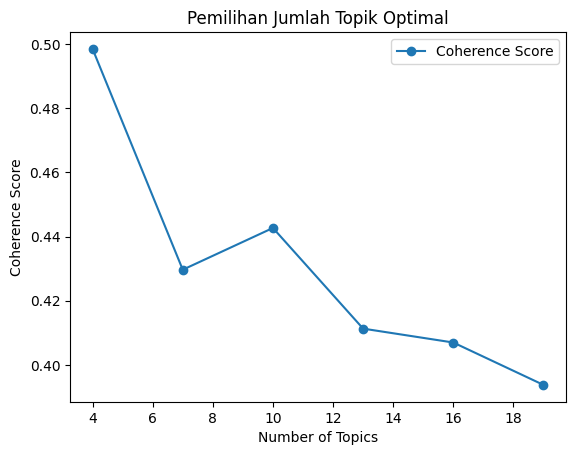

Jumlah topik optimal berdasarkan koherensi: 4
(0, '0.059*"luas" + 0.032*"makan" + 0.029*"layan" + 0.027*"renang" + 0.026*"bintang" + 0.026*"menu" + 0.022*"sarap" + 0.022*"parkir" + 0.021*"harga" + 0.018*"ramah"')
(1, '0.038*"bersih" + 0.026*"inap" + 0.024*"mandi" + 0.023*"makan" + 0.022*"renang" + 0.021*"luas" + 0.020*"air" + 0.018*"awat" + 0.018*"sayang" + 0.017*"dingin"')
(2, '0.051*"ramah" + 0.047*"layan" + 0.047*"surabaya" + 0.035*"bersih" + 0.035*"kota" + 0.026*"luas" + 0.025*"bumi" + 0.021*"inap" + 0.020*"makan" + 0.017*"aroma"')
(3, '0.086*"makan" + 0.044*"menu" + 0.042*"surabaya" + 0.029*"kota" + 0.024*"pilih" + 0.018*"pusat" + 0.017*"situasi" + 0.017*"indonesia" + 0.017*"tradisional" + 0.016*"allyoucaneat"')


In [ ]:
import gensim
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import CoherenceModel

# load data
lda_text = data_clean['text_clean_stemming'].apply(lambda x: x.split())

dictionary = corpora.Dictionary(lda_text)

# Filtering Word
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

corpus = [dictionary.doc2bow(text) for text in lda_text]

# LDA Function
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3, random_state=None):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus,
                                           num_topics=num_topics,
                                           id2word=dictionary,
                                           passes=15,
                                           workers=2,
                                           random_state=random_state)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model,
                                        texts=texts,
                                        dictionary=dictionary,
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(f"Num Topics = {num_topics}, Coherence = {coherencemodel.get_coherence():.4f}")
    return model_list, coherence_values

start, limit, step = 4, 20, 3
model_list, coherence_values = compute_coherence_values(dictionary=dictionary,
                                                        corpus=corpus,
                                                        texts=lda_text,
                                                        start=start,
                                                        limit=limit,
                                                        step=step,
                                                        random_state=None)

# Coherence Plot to see optimal topic
x = range(start, limit, step)
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Pemilihan Jumlah Topik Optimal")
plt.legend(["Coherence Score"], loc='best')
plt.show()

# Get a optimal topic from highest score
optimal_num_topics = x[coherence_values.index(max(coherence_values))]
print("Jumlah topik optimal berdasarkan koherensi:", optimal_num_topics)

# LDA model from total optimal topic
optimal_model = gensim.models.LdaMulticore(corpus,
                                           num_topics=optimal_num_topics,
                                           id2word=dictionary,
                                           passes=15,
                                           workers=2,
                                           random_state=None)

# Show topic optimal
topics = optimal_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


# LDA VISUALIZATION USING PYLDAVIS

In [40]:
# Prepare the visualization
lda_display = gensimvis.prepare(optimal_model, corpus, dictionary, sort_topics=False)

# Save visualization to an HTML string
html_str = pyLDAvis.prepared_data_to_html(lda_display)

# Display the HTML content
display(HTML(html_str))

# TOPIC MODELLING USING LSA

Num Topics = 4, Coherence = 0.6139
Num Topics = 7, Coherence = 0.5683
Num Topics = 10, Coherence = 0.5441
Num Topics = 13, Coherence = 0.5575
Num Topics = 16, Coherence = 0.5285
Num Topics = 19, Coherence = 0.5250


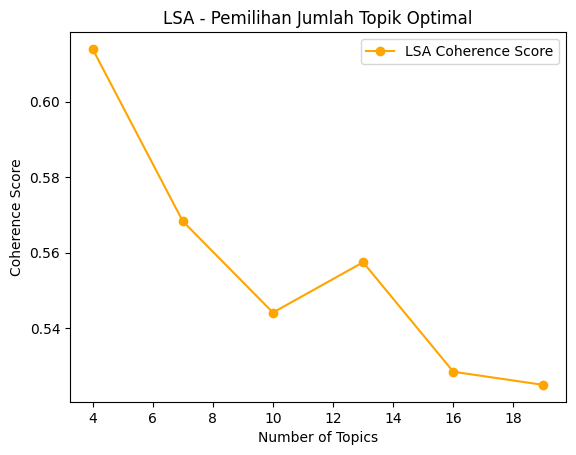

Jumlah topik optimal LSA berdasarkan koherensi: 4

Topik LSA dengan 4 topik (berdasarkan koherensi):

Topik 1:
  makan           0.2943
  luas            0.2764
  surabaya        0.2693
  bersih          0.2479
  layan           0.2469
  kota            0.2388
  ramah           0.2325
  menu            0.2076
  lengkap         0.1588
  strategis       0.1426

Topik 2:
  makan           0.5368
  menu            0.3282
  harga           0.1186
  indonesia       0.1186
  lumayan         0.1031
  jepang          0.0997
  masakan         0.0977
  pilih           0.0956
  tradisional     0.0946
  buffet          0.0923

Topik 3:
  bersih          0.4347
  layan           0.2888
  ramah           0.2807
  luas            0.2640
  parkir          0.1228
  mandi           0.0932
  sarap           0.0824
  lengkap         0.0634
  renang          0.0537
  strategis       0.0486

Topik 4:
  luas            0.5346
  parkir          0.1724
  strategis       0.1492
  lengkap         0.1463
  renang 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

lsa_text = data_clean['text_clean_stemming'].apply(lambda x: x.split())

joined_docs = data_clean['text_clean_stemming'].tolist()

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc.split(), lowercase=False)
tfidf_matrix = tfidf_vectorizer.fit_transform(joined_docs)

# Mapping TF-IDF vocab to Gensim Dictionary
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
dictionary_lsa = corpora.Dictionary(lsa_text)
corpus_lsa = [dictionary_lsa.doc2bow(text) for text in lsa_text]

# function for model lsa coherence
def compute_lsa_coherence(tfidf_matrix, dictionary, texts, start=2, limit=20, step=3):
    coherence_scores = []
    models = []

    for num_topics in range(start, limit, step):
        lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
        lsa_model.fit(tfidf_matrix)
        models.append(lsa_model)

        # Pick the top words for each topic
        terms = tfidf_feature_names
        topics = []
        for topic_idx, component in enumerate(lsa_model.components_):
            top_words_idx = component.argsort()[-10:][::-1]
            topics.append([terms[i] for i in top_words_idx])

        # Use the Coherence Model for evaluation
        coherence_model = CoherenceModel(
            topics=topics,
            texts=texts,
            dictionary=dictionary,
            coherence='c_v'
        )
        coherence = coherence_model.get_coherence()
        coherence_scores.append(coherence)
        print(f"Num Topics = {num_topics}, Coherence = {coherence:.4f}")

    return models, coherence_scores

start, limit, step = 4, 20, 3
lsa_models, lsa_coherence_scores = compute_lsa_coherence(
    tfidf_matrix, dictionary_lsa, lsa_text, start, limit, step
)

x = range(start, limit, step)
plt.plot(x, lsa_coherence_scores, marker='o', color='orange')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("LSA - Pemilihan Jumlah Topik Optimal")
plt.legend(["LSA Coherence Score"], loc='best')
plt.show()

optimal_lsa_topics = x[lsa_coherence_scores.index(max(lsa_coherence_scores))]
print("Jumlah topik optimal LSA berdasarkan koherensi:", optimal_lsa_topics)


best_lsa_model = lsa_models[lsa_coherence_scores.index(max(lsa_coherence_scores))]

print(f"\nTopik LSA dengan {optimal_lsa_topics} topik (berdasarkan koherensi):\n")

terms = tfidf_vectorizer.get_feature_names_out()

for topic_idx, component in enumerate(best_lsa_model.components_):
    top_indices = component.argsort()[-10:][::-1]
    print(f"Topik {topic_idx+1}:")
    for i in top_indices:
        term = terms[i]
        weight = component[i]
        print(f"  {term:<15} {weight:.4f}")
    print()



c:\Users\binta\anaconda3\envs\test\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\binta\anaconda3\envs\test\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\binta\anaconda3\envs\test\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\binta\anaconda3\envs\test\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\binta\anaconda3\envs\test\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, ar

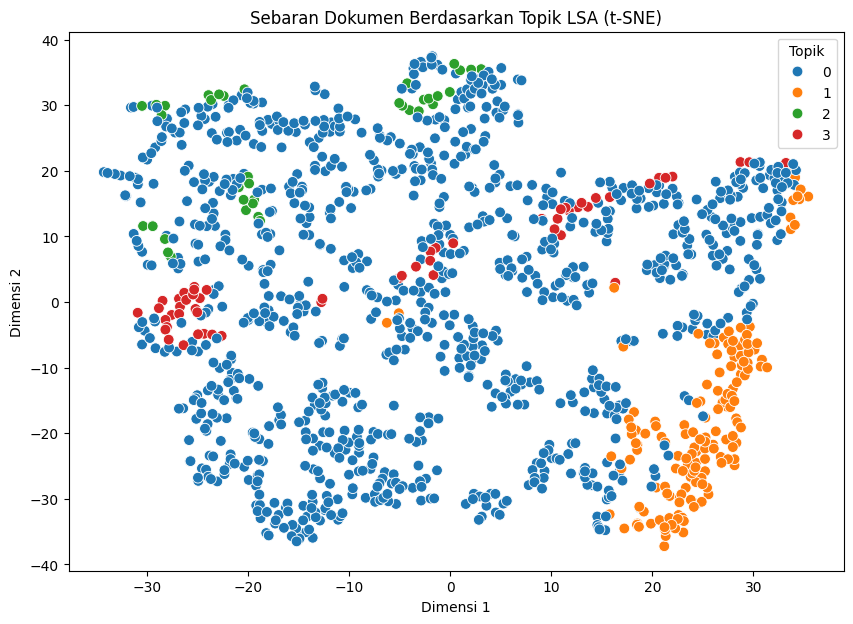

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

lsa_doc_topic = best_lsa_model.transform(tfidf_matrix)


tsne_model = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_2d = tsne_model.fit_transform(lsa_doc_topic)

dominant_topics = lsa_doc_topic.argmax(axis=1)


plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_2d[:, 0], y=tsne_2d[:, 1], hue=dominant_topics, palette='tab10', s=60)
plt.title("Sebaran Dokumen Berdasarkan Topik LSA (t-SNE)")
plt.xlabel("Dimensi 1")
plt.ylabel("Dimensi 2")
plt.legend(title='Topik')
plt.show()


c:\Users\binta\anaconda3\envs\test\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\binta\anaconda3\envs\test\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Text(0.5, 1.0, 'UMAP: Sebaran Dokumen Berdasarkan Topik LSA')

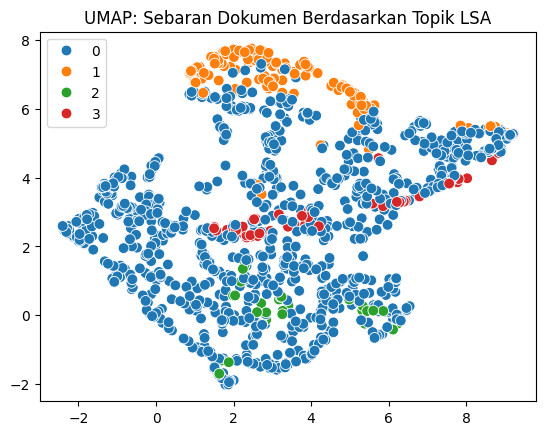

In [46]:
import umap.umap_ as umap

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(lsa_doc_topic)

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=dominant_topics, palette='tab10', s=60)
plt.title("UMAP: Sebaran Dokumen Berdasarkan Topik LSA")


In [49]:
# Menyimpan kelompok topik untuk setiap dokumen
def get_document_topic(doc_bow):
    # Dapatkan distribusi topik untuk dokumen
    topic_distribution = optimal_model.get_document_topics(doc_bow)
    # Ambil topik dengan probabilitas tertinggi
    return max(topic_distribution, key=lambda x: x[1])[0]

# Tambahkan kolom 'topic' ke DataFrame
data_clean['topic'] = data_clean['text_clean_stemming'].apply(lambda x: get_document_topic(dictionary.doc2bow(x.split())))

# Simpan DataFrame ke CSV
data_clean.to_csv('final project mdtt data/best_topic_modelling.csv', index=False)

In [50]:
data_clean_new = pd.read_csv('final project mdtt data/best_topic_modelling.csv', encoding='utf-8')
data_clean_new.head()

,Rating (1-5),Ulasan,text_clean,text_clean_stemming,topic
0,1,1st time pengalaman nginep di hotel ini. hotel...,st time pengalaman menginap di hotel ini hotel...,st time alam inap bintang kota surabaya bayang...,1
1,5,🌟 Rating: 5/5 Staycation bersama anak di Bumi...,rating staycation bersama anak di bumi surabay...,rating staycation bumi surabaya senang lantai ...,2
2,4,"Kita stay di Classic Room,plusnya semua kamar ...",kita stay di classic room plusnya semua kamar ...,stay classic room plus city view cantik bathtu...,0
3,4,Dulu saat pertama kali staycation di Bumi Sura...,dulu saat pertama kali staycation di bumi sura...,staycation bumi surabaya bintang bintang salur...,2
4,4,"Kamar nya bersih, luas hanya saja desain lama....",kamar ya bersih luas hanya saja desain lama la...,bersih luas desain layan ramah pintu strategis...,2


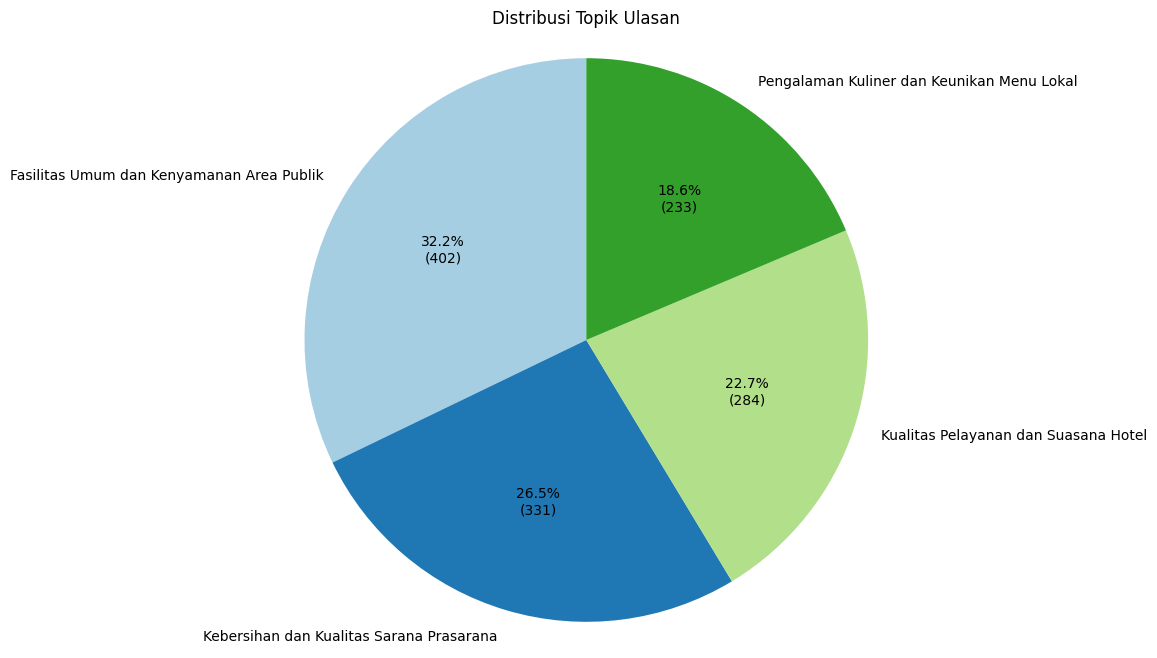

In [51]:

topic_counts = data_clean_new['topic'].value_counts()

topic_labels = ['Fasilitas Umum dan Kenyamanan Area Publik',
                'Kebersihan dan Kualitas Sarana Prasarana',
                'Kualitas Pelayanan dan Suasana Hotel',
                'Pengalaman Kuliner dan Keunikan Menu Lokal']

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=topic_labels, autopct=lambda pct: func(pct, topic_counts),
        startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribusi Topik Ulasan')
plt.axis('equal')
plt.show()

# WORD CLOUD 

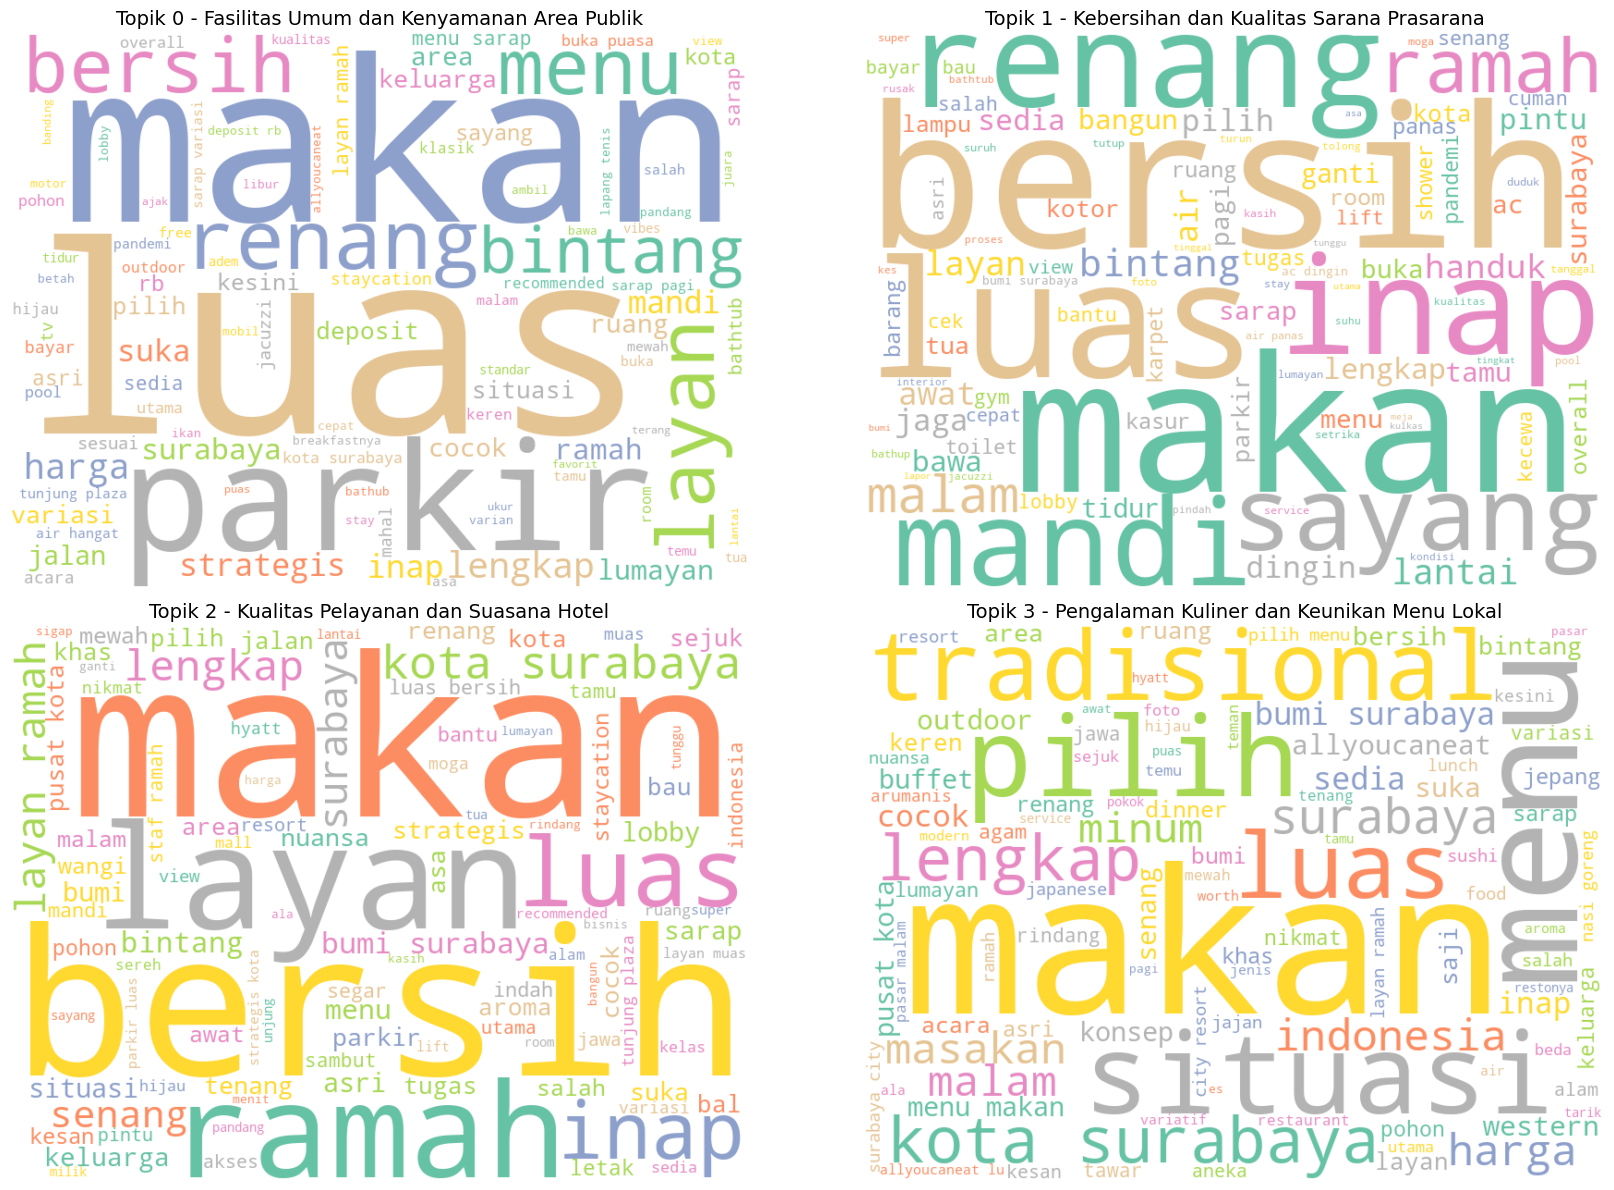

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load dataset
data_clean_new = pd.read_csv('final project mdtt data/best_topic_modelling.csv', encoding='utf-8')

# Label topik
topic_labels = {
    0: 'Fasilitas Umum dan Kenyamanan Area Publik',
    1: 'Kebersihan dan Kualitas Sarana Prasarana',
    2: 'Kualitas Pelayanan dan Suasana Hotel',
    3: 'Pengalaman Kuliner dan Keunikan Menu Lokal'
}

# visualisasi WordCloud per topik
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for topic_id, ax in enumerate(axes):
    topic_text = data_clean_new[data_clean_new['topic'] == topic_id]['text_clean_stemming'].str.cat(sep=' ')
    
    wordcloud = WordCloud(
        width=800,
        height=600,
        background_color='white',
        max_words=100,
        colormap='Set2'
    ).generate(topic_text)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Topik {topic_id} - {topic_labels[topic_id]}", fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


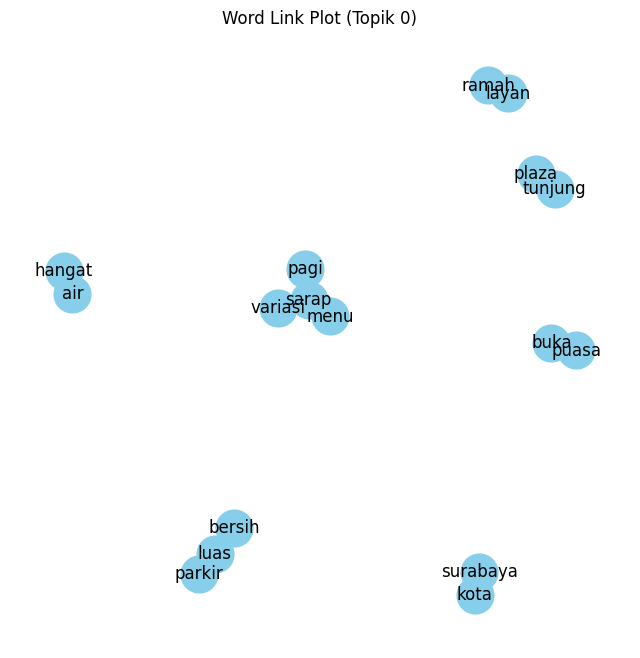

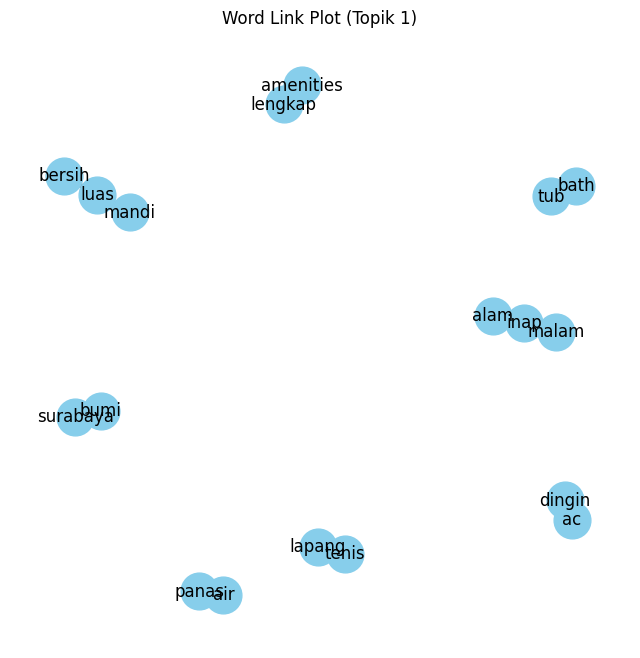

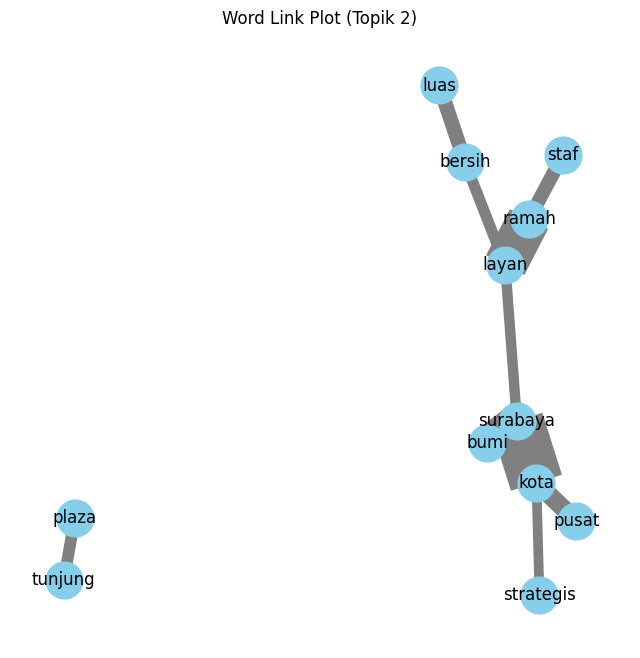

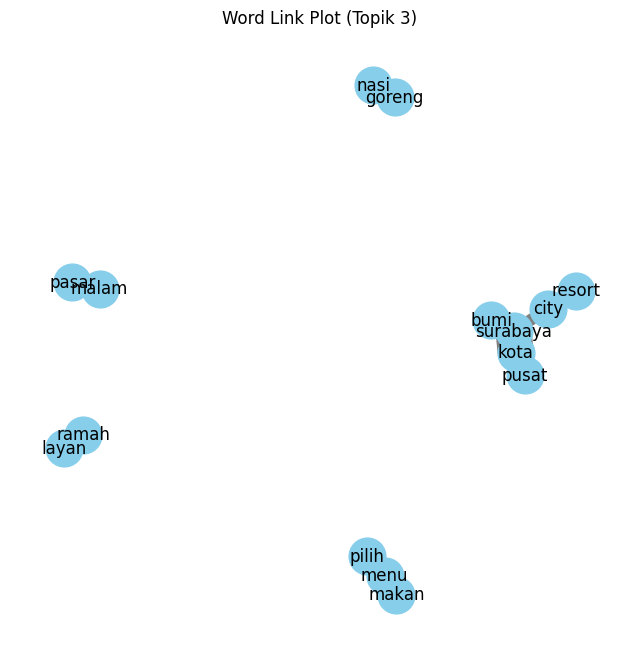

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams

# Load dataset
df_wordlink = pd.read_csv("final project mdtt data/best_topic_modelling.csv", encoding='utf-8')
df_wordlink['text_clean_stemming'] = df_wordlink['text_clean_stemming'].fillna("")

# Define additional stopwords if necessary
custom_stopwords = {'di', 'yang', 'ini', 'nya', 'saja', 'bisa', 'tidak', 'dan', 'ada', 'saya'}

# Take all unique topics from the ‘topic’ column
unique_topics = df_wordlink['topic'].unique()

# Loop to create and display Word Link Plot for each topic
for topic_number in sorted(unique_topics):
    filtered_df = df_wordlink[df_wordlink['topic'] == topic_number]
    all_text = ' '.join(filtered_df['text_clean_stemming'].dropna())
    
    # Tokenization and stopword filtering
    words = [word for word in all_text.split() if word not in custom_stopwords]
    
    bigrams = list(ngrams(words, 2))
    bigram_counts = Counter(bigrams)
    most_common_bigrams = bigram_counts.most_common(10)

    # Build a graph with NetworkX
    G = nx.Graph()
    for bigram, count in most_common_bigrams:
        word1, word2 = bigram
        G.add_edge(word1, word2, weight=count)

    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, k=0.5)
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
    nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] * 0.5 for u, v in G.edges()], edge_color="grey")
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
    plt.title(f"Word Link Plot (Topik {topic_number})")
    plt.axis("off")
    plt.show()
